<a href="https://colab.research.google.com/github/GeraldEspi/ADA-informes/blob/main/BucketSort_Informe5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento.

Los problemas de ordenamiento en la computación son un problema que a persistido desde los inicios de la informática, tener un registro de distintos datos ordenados respecto a ciertos paramétros cuantificables permite resolver, como efecto secundario, otra variedad de problemas que solicitan que ciertos datos posean una organización específica, ya sea para una búsqueda más sencilla por mano de un operador o en su defecto, para una lectura más eficiente desde otra función u programa que solicite dichos datos.

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$
, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

**Ejemplo:**

>Un usuario requiere ver los precios de ciertos productos en la página de una tienda,los precios comienzan desde el producto más barato hasta el más caro. Debido a la gran cantidad de artículos relacionados a su búsqueda, para llegar a la sección en la que se encuentra su presupuesto requeriría de mover varias secciones más adelante, atrasando su búsuqueda, por ende, para una mayor agilización del proceso el usuario cambia el orden de menor a mayor, a mayor y menor. La **búsqueda se facilita**.


Precios.

![image](https://cdn.discordapp.com/attachments/838249461268217916/1017699118921043998/Dividir_4.png)

*Imágen hecha en canvas.*



## Código

In [53]:
def insertionSort(arr, verbose = False):
  
    #se recorre el arreglo
    for i in range(1, len(arr)):
  
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key
  

In [176]:
from matplotlib.cbook import contiguous_regions
from termcolor import colored

def bucket_sort(alist, verbose = False):
    # Establece los largos
    largest = max(alist)
    length = len(alist)
    size = largest/length

    # Crea los buckets vacíos
    buckets = [[] for _ in range(length)]
    if verbose:print(colored("Elementos asignados a cada Bucket: ", "blue"))

    #Inserta los elementos en los respectivos buckets
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
    
    cont = 0
    for i in range(length):
     
        cont += 1
        if verbose:print(colored("Bucket", "green"), "[", cont,"]", end = ": ")
        if verbose:print(buckets[i])
    if verbose:print(colored("\n------------------------------------------\n","blue"))
    if verbose:print(colored("Elementos ordenados en cada Bucket: ", "blue"))

    for i in range(length):
        insertionSort(buckets[i])
        if verbose:print(colored("Bucket", "green") ,"[", i,"]", end = ": ")
        if verbose:print(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
    if verbose:print(colored("\n------------------------------------------\n","blue"))
    if verbose:print(colored("Se concatenan:", "blue"))
    cont = 0
    for i in range(length):
        for j in range(len(buckets[i])):
            if verbose:print(colored("------","blue"))
            if verbose:print(colored(f"En el arreglo de entrada ingresan:","green"), (f"[{i}][{j}] = {buckets[i][j]}"))
            if verbose:print(colored(f"#lista" ,"green"),"[", (f"{cont}"),"]", "=", (f"{buckets[i][j]}"))
            alist[cont] = buckets[i][j]
            cont += 1
            if verbose:print(colored("Queda entonces:","green"), (f"{alist[:cont]}"))
 
    return result
 

alist = [29, 12, 3, 49, 9, 21, 43]
print(colored(" \-----/","blue"),colored("Arreglo de entrada:","yellow"), alist,colored("\-----/","blue"),"\n")
sorted_list = bucket_sort(alist)
print('\n',colored("\-----/","blue"),colored('Arreglo de salida: ', "yellow"), end='')
print(sorted_list, end = "")
print(colored(" \-----/","blue"))

 \-----/ Arreglo de entrada: [29, 12, 3, 49, 9, 21, 43] \-----/ 


 \-----/ Arreglo de salida: [3, 9, 12, 21, 29, 43, 49] \-----/


# 2. Descripción del algoritmo

BucketSort es un algoritmo altamente eficiente en rangos de datos que se encuentren uniformemente distrbuidos, dicho de otro modo, ordena de manera eficiente si dichos datos no se salen de un rango establecido. 

**No ordena números negativos**, solo positivos. Debido a que el algoritmo no está diseñado para eso y por ende pierde su utilidad y eficiencia si se intenta.

De manera individual, BucketSort solo crea y gestiona los bucket donde los números del arreglo serán almacenados, pero no los ordena. Por ende ecesita de una función Sort auxiliar para que ordene que cada bucket de manera individual.

El algoritmo utilizado por BucketSort podría resumirse en los siguientes pasos:


> 1.- Inicializar una cantidad n de *buckets* **vacíos**. Dichos solo almacenarán los datos que entren dentro de su rango.

![image](https://cdn.discordapp.com/attachments/838249461268217916/1017858344666550382/Dividir_4.png)

*Imágen hecha en canvas*

>2.- En base al arreglo original, posiciona cada elemento en el *bucket* que, según su rango. (Scatter, Dispersión)

![image](https://cdn.discordapp.com/attachments/838249461268217916/1017859550747041882/Dividir_5.png)

*Imágen hecha en canvas*

>3.-Ordenar todos los *bucket* no **vacíos**, utilizando InsertionSort.

>4.- Finalmente, se visita cada *bucket* en orden y se posicionan todos los elementos en el arreglo origial. (Gather, Recolección)

![image](https://cdn.discordapp.com/attachments/838249461268217916/1017861442952777778/Dividir_6.png)

*Imágen hecha en canvas*

Debido a la propia implementación del algoritmo, el no tener una distribución uniforme dentro de los datos causa por ende, 





# Ejemplo

In [177]:
alist = [1,9,23,27,30,34,45]
print(colored(" \-----/","blue"),colored("Arreglo de entrada:","yellow"), alist,colored("\-----/","blue"),"\n")
sorted_list = bucket_sort(alist, verbose = True)
print('\n',colored("\-----/","blue"),colored('Arreglo de salida: ', "yellow"), end='')
print(sorted_list, end = "")
print(colored(" \-----/","blue"))

 \-----/ Arreglo de entrada: [1, 9, 23, 27, 30, 34, 45] \-----/ 

Elementos asignados a cada Bucket: 
Bucket [ 1 ]: [1]
Bucket [ 2 ]: [9]
Bucket [ 3 ]: []
Bucket [ 4 ]: [23]
Bucket [ 5 ]: [27, 30]
Bucket [ 6 ]: [34]
Bucket [ 7 ]: [45]

------------------------------------------

Elementos ordenados en cada Bucket: 
Bucket [ 0 ]: [1]
Bucket [ 1 ]: [9]
Bucket [ 2 ]: []
Bucket [ 3 ]: [23]
Bucket [ 4 ]: [27, 30]
Bucket [ 5 ]: [34]
Bucket [ 6 ]: [45]

------------------------------------------

Se concatenan:
------
En el arreglo de entrada ingresan: [0][0] = 1
#lista [ 0 ] = 1
Queda entonces: [1]
------
En el arreglo de entrada ingresan: [1][0] = 9
#lista [ 1 ] = 9
Queda entonces: [1, 9]
------
En el arreglo de entrada ingresan: [3][0] = 23
#lista [ 2 ] = 23
Queda entonces: [1, 9, 23]
------
En el arreglo de entrada ingresan: [4][0] = 27
#lista [ 3 ] = 27
Queda entonces: [1, 9, 23, 27]
------
En el arreglo de entrada ingresan: [4][1] = 30
#lista [ 4 ] = 30
Queda entonces: [1, 9, 23, 27, 30

# 3. Tiempo de ejecución

Se establece.

>**Caso promedio**: $O(n)$

> **Peor caso**: $O(n^2)$

### **Caso promedio**

El tiempo de ejecución de BucketSort varía según la situación que se presente a la hora de ordenar los datos de entrada. En primera instancia, cuando los datos se encuentran distrubuidos de manera aleatoria, presenta una complejidad lineal $O(n)$, dado que ambas funciones (Insertion y Bucket sort) logran el orden sin recurrir a recursión y tienden a ser lineales.

En el caso concreto de InsertionSort, esta tiende a la linealidad debido a la propia implementación del algoritmo, donde una versión simplificada del arreglo es entregada a InsertionSort.

>*Imágen hecha en canvas.*

![image](https://cdn.discordapp.com/attachments/838249461268217916/1017675124473868349/Dividir_2.png)

**Rango [0,1]**
>**Ejemplo caso promedio**: $[0.3,.67,0.68,0.10,0.70]$

Comúnmente InsertionSort posee una complejidad cuadrática $O(n^2)$ en su caso promedio, pero para casos en el que el arreglo de entrada está parcialmente ordenado pasa a ser una función linear $O(n)$. Esta pecualiaridad hace que sea bastante eficiente en conjunto a BucketSort.

El caso promedio puede mejorar sustancialmente si los datos de entrada se encuentran parcialmente ordenados. Esto ya que se dará el caso en el que dentro de los "buckets" hayan elementos ya ordenados y posicionados correctamente, agilizando el proceso, aún así, la complejidad cuando esto ocurre ya sea en varias ocasiones o solo una vez, sigue siendo lineal $O(n)$.

###**Peor caso**

El peor caso por su parte se da cuando los datos del arreglo de entrada tiene un corto rango entre sus elementos, es decir, cuando los datos de arreglo son cercanos entre sí, por ejemplo un arreglo de rango  $[1,5]$. Esto daría como resultado que algunos "buckets" tuvieran más elementos que otros, realentizando el proceso. 

**Se busca ordenar de menor a mayor.**

>**Ejemplo caso desfavorable**: $[1,4.3,5,3.7,2.1]$

>**Ejemplo caso altamente desfavorable**: $[5,4.3,3.2,2.1,1.3]$

Sí se usa en conjunto de InsertionSort, como en la presente situación, un caso altamente desfavorable ocurre cuando el arreglo de entrada se encuentra ordenado de manera inversa a la deseada haciendo que el tiempo de ejecucuón crezca $O(n^2)$.



# 4. Correctitud

## Bucket Sort

### **Teorema (Correctitud).**

El algoritmo ***Bucket Sort*** genera 10 buckets(subintervalos) con los elementos del arreglo de entrada donde corresponde, cada bucket se ordena de menor a mayor, es decir, $a_1\leq a_2 \leq... \leq a_n$
, y luego los bucket se ingresan al arreglo desde el bucket[0] al bucket[9].

## **Prueba del Teorema**

Para probar la correctitud de **Bucket** **Sort** usaremos **inducción** **matemática** debido a la recursividad del algoritmo.

>En **inducción matemática**, para probar una declaración, o teorema en este caso, para todos los casos posibles, típicamente debemos comprobar si lo siguiente cumple el teorema:

>1.- Se prueba caso base que debe ser simple.
>2.- Se prueba un caso cualquiera que también sea válido para el último caso.

Nuestro teorema dice que $Bucket Sort$ retorna un arreglo ordenado con la secuencia de **n** elementos de entrada, siendo elementos entre $[0.0, 1.0[$

### **caso base**

Probemos como caso base cuando **Bucket Sort** recibe una secuencia de 1 elemento.

Cuando **Bucket Sort** recibe una secuencia de 1 elementos, creara 10 buckets, el elemento ingresara al bucket donde corresponde.

Una vez creados los buckets, se ordenarán aplicando insertionSort(en informe pasado confirmamos su correctitud).

Con los buckets ordenados, se ingresará los elemento de los buckets no vacíos en el arreglo (solo hay un bucket no vacío y tiene un elemento). El arreglo final será igual que el recibido, y estará ordenado, con 1 elemento siempre será ordenado.

### **Caso cualquiera**

Ahora veremos un caso cualquiera del Bucket Sort recibe una secuencia de  elementos.

Cuando Bucket Sort recibe una secuencia de $n$ elementos, creará 10 buckets y distribuirá los elementos del arreglo en los bucket que les corresponden.

Bucket[k] contendrá elementos $0.k...$, es decir, $\frac{k}{10} \leq elementos < \frac{k+1}{10}$ con $0.0 \leq k < 10.0$

Los elementos siempre encontraran en el bucket correspondiente ya que para decidir donde insertarlos, se multiplica el elemento por $10$, lo que será el número de su décima para usar de indice.

$0.1 * 10 = 1$ el elemento $0.1$ irá al bucket 1.

Una vez creados los buckets, se aplicará insertionSort, algoritmo de ordenamiento correcto, a cada uno, dejando los elementos dentro de los buckets ordenados.

Con los buckets ordenados, se ingresará los elemento de los buckets no vacíos en el arreglo, $bucket[i] ← i=0...9$.

El arreglo final contendrá todos los elementos del arreglo recibido de manera ordenada.


# 5. Experimentos

A continuación se realizarán experimentos los cuales incluyen investigar:

* Comparar los tiempos de ejecución entre BucketSort con InsertionSort con RadixSort.

* Comparar los tiempos de ejecución entre BucketSort con insertion sort y CountingSort.

* Comparar los tiempos de ejecución entre BucketSort con InsertionSort e InsertionSort de manera inidividual e investigar cual es el origen de la diferencia en los resultados.

Se utilizarán datos de tamaño $n \in [5,200]$ 
y $n \in [5,300]$ 

Los elementos de los arreglos generados estarán compuestos por números que van desde el 1 al 1000.

### **Implementación RadixSort**

In [19]:
def radix_sort(nums):
    RADIX = 10
    placement = 1
    max_digit = max(nums)

    while placement < max_digit:
      buckets = [list() for _ in range( RADIX )]
      for i in nums:
        tmp = int((i / placement) % RADIX)
        buckets[tmp].append(i)
      a = 0
      for b in range( RADIX ):
        buck = buckets[b]
        for i in buck:
          nums[a] = i
          a += 1
      placement *= RADIX
    return nums

nums = [67, 59, 79, 27, 4, 48]
print(radix_sort(nums))

[4, 27, 48, 59, 67, 79]


### **Implementación CountingSort**

In [25]:
def countingSort(inputArray):
    # Find the maximum element in the inputArray
    maxElement= max(inputArray)

    countArrayLength = maxElement+1

    # Initialize the countArray with (max+1) zeros
    countArray = [0] * countArrayLength


    for el in inputArray: 
        countArray[el] += 1
    for i in range(1, countArrayLength):
        countArray[i] += countArray[i-1] 

    # Step 3 -> Calculate element position
    # based on the countArray values
    outputArray = [0] * len(inputArray)
    i = len(inputArray) - 1
    while i >= 0:
        currentEl = inputArray[i]
        countArray[currentEl] -= 1
        newPosition = countArray[currentEl]
        outputArray[newPosition] = currentEl
        i -= 1

    return outputArray

# **CountingSort vs InsertionSort vs RadixSort**

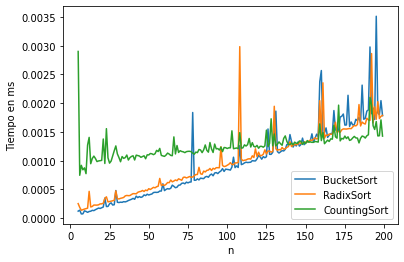

In [64]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat
x=[]; y=[] ; y1=[] ; y2=[] ; verbose = False

for n in range(5,200): 
    a = random.sample(range(1, 1000), n)
    #la función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import radix_sort", stmt=f"radix_sort({a})", repeat=1, number=10)
    t2 = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({a})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)
    y2.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["BucketSort","RadixSort","CountingSort"])
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# Analaisis resultados

Complejidades temporales promedio:

>BucketSort: $O(n)$

>RadixSort: $O(nk)$

>CountingSort $O(n+k)$

**Dentro del rango $[1,1000[$**

Tras un análisis al presente gráfico, puede evidenciarse así las utilidades de cada algoritmo y que es lo que hace que cada uno sea útil en ciertas situaciones específicas y otras en las que no.

En primera instancia, los resultados inidican que ningún algoritmo presenta una sustancial diferencia con los demás, los 3 poseen tiempos de ejecución similares. Por su parte BucketSort y RadixSort presentan diferencias mínimas, ténicamente despreciables. Esto debido a que, ambos en su caos primedio poseen un crecimiento lineal, pero en la eventualidadm y entre más n elementos tenga un arreglo, BucketSort terminará siendo más eficiente. Dicho lo anterior, es de recalcar también que el rango establecido beneficia en gran manera BucketSort, y cada vez que el número de casillas aumenta, permite establecer rangos en cada balde más amplios.

Respecto a CountingSort, en primera instancia demostró ser ineficiente enfrentandose a a pocos datos, y mejorar con respecto a sus homólogos desde los 175 a 200 n elementos.

### **Peaks**

También es de recalcar que los peaks ocurridos son comunes en entornos donde el servidor que ejecuta el programa esté ligado a la conexión a internet, la inestabilidad de estos sistemas en conjunto a los tiempos milesimas de segundo, causa que cualquier anomalía se traduzca en un pronunciado "peak", por ende, suelen ser menos comunes en comparaciones en los que los tiempos de ejecución sean mayores como lo demuestra el experimento siguiente.


### **Implementación InsertionSort**



### **¿Qué se busca investigar?**

Estudiar las diferencias que presenta InsrtionSort trabajando de manera individual y compararlo a contraste con una implementación que haga uso de una función auxiliar como lo es BucketSort.

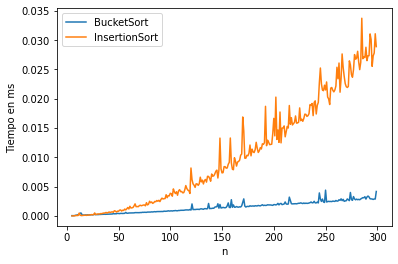

In [69]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y=[] ; y1=[] ; verbose = False
for n in range(5,300):
    a = random.sample(range(1, 1000), n)
    #la función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
    x.append(n)
    y.append(t)
    y1.append(t1)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["BucketSort","InsertionSort"])
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# Análisis de resultados

Complejidades temporales promedio:

> BucketSort: $O(n)$

> InsertionSort: $O(n^2)$

Es evidente que, una vez InsertionSort es asistido por una función auxiliar como lo es BucketSort, sus resultados pueden ser sustancialemtne mejores.

Lo anterior ocurre a causa de que, InsertionSort tiende a crecer de manera exponencial entre más n datos tenga el arreglo de entrada. BucketSort al utilizar los llamados "buckets" donde almacena los datos de cierto rango, entrega una versión simplificada a InsertionSort, facilitando la tarea de InsertionSort, tendiendo a una complejidad lineal.